In [2]:
import os
import glob
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
import shutil
import PIL

Using TensorFlow backend.


In [3]:
!pwd

/media/hdd1/dataset/cats_dogs


In [4]:
from keras import applications

# build the VGG16 network
model = applications.VGG16(include_top=False,
                           weights='imagenet')

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

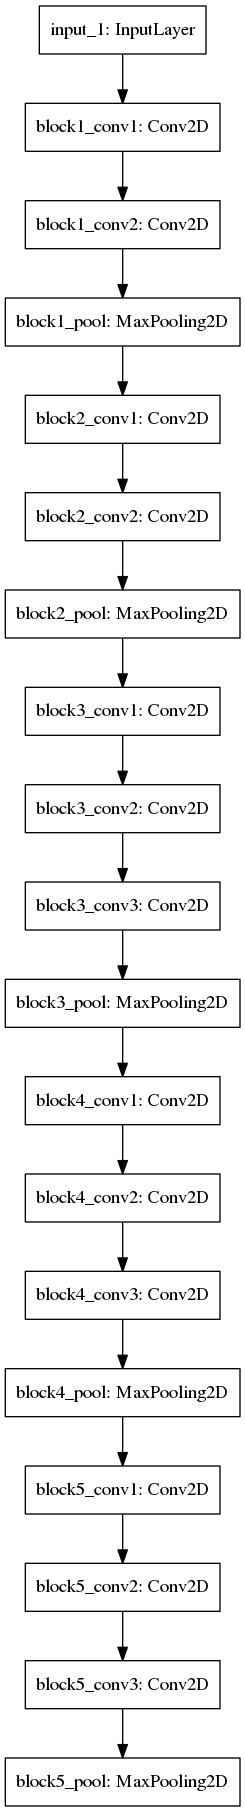

In [7]:
load_img("vgg.png")

In [9]:
from keras import backend as K
layer_name = 'block5_conv3'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])


In [14]:
layer_output

<tf.Tensor 'block5_conv3/Relu:0' shape=(?, ?, ?, 512) dtype=float32>

In [15]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [39]:
import numpy as np
a = np.random.normal(0,1,size=(3,3,3,512))

In [41]:
a[:,:,:,0]

array([[[-0.03410246, -0.33794271, -1.4892383 ],
        [ 1.5121149 ,  2.01914825,  1.05841303],
        [-0.37620546, -1.1420366 , -1.40359266]],

       [[-1.03840166,  2.49618232, -0.71965914],
        [-0.93215165, -1.03933233, -0.5520194 ],
        [ 0.05397904, -0.48454115, -0.93536454]],

       [[-0.91646005,  0.15052337,  1.43448021],
        [ 0.05538351, -0.13140453, -2.53937614],
        [-0.2409791 , -0.16688561, -0.3272798 ]]])